In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt 
import os 
from Utils.Read_data import *

c:\Users\anisr\anaconda3\envs\work\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\anisr\anaconda3\envs\work\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\anisr\anaconda3\envs\work\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
path = "DataPaper/"
users = os.listdir(path)

In [3]:
df_activity =create_dataset(users,'activity')
df_activity.head()

NO data for actigraph_expanded.csv


,Activity,Start,End,Day,user
0,2.0,10:00,10:22,1,user_1
1,9.0,10:37,10:40,1,user_1
2,10.0,10:40,10:45,1,user_1
3,6.0,10:55,11:00,1,user_1
4,2.0,11:00,11:20,1,user_1


In [4]:
df_actigraph = create_dataset(users,'actigraph')
df_actigraph.head()

NO data for actigraph_expanded.csv


,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,day,time,user
0,NaN,NaN,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1,10:10:22,user_1
1,11.0,4.0,7.0,1.0,68.0,NaN,1.0,NaN,NaN,13.64,1,10:10:23,user_1
2,NaN,21.0,10.0,NaN,68.0,NaN,NaN,1.0,NaN,23.26,1,10:10:24,user_1
3,NaN,1.0,24.0,NaN,68.0,NaN,NaN,1.0,NaN,24.02,1,10:10:25,user_1
4,34.0,14.0,63.0,1.0,154.0,NaN,1.0,NaN,NaN,72.95,1,10:10:26,user_1


In [5]:
# df_actigraph.dropna(axis=1,inplace=True)

In [6]:
df_actigraph['time'] = pd.to_datetime(df_actigraph['time'],format='%H:%M:%S').dt.time

In [7]:
df_activity['Start'] = df_activity.apply(convert_Activity_Start_datetime,axis=1)

In [8]:
df_activity['End'] = df_activity.apply(convert_Activity_End_datetime,axis=1)

In [9]:
df_activity

,Activity,Start,End,Day,user
0,2.0,10:00:00,10:22:00,1,user_1
1,9.0,10:37:00,10:40:00,1,user_1
2,10.0,10:40:00,10:45:00,1,user_1
3,6.0,10:55:00,11:00:00,1,user_1
4,2.0,11:00:00,11:20:00,1,user_1
...,...,...,...,...,...
14,1.0,05:15:00,05:25:00,2,user_9
15,NaN,05:25:00,09:00:00,2,user_9
16,6.0,11:10:00,11:20:00,1,user_9
17,12.0,23:30:00,23:40:00,1,user_9


In [10]:
df_actigraph = df_actigraph.rename(columns={'day':'Day'})

In [11]:
df_actigraph.shape

(1462678, 13)

In [12]:
expanded_rows = []
for idx, actigraph_row in df_actigraph.iterrows():
    day = actigraph_row['Day']
    time = actigraph_row['time']
    user = actigraph_row['user']

    mask = (df_activity['Day'] == day) & (df_activity['user'] == user) & \
           (df_activity['Start'] <= time) & (df_activity['End'] >= time)

    matched_activities = df_activity.loc[mask, 'Activity'].values

    if len(matched_activities) > 0:
        for activity in matched_activities:
            new_row = actigraph_row.copy()
            new_row['Activity'] = activity
            expanded_rows.append(new_row)
    else:
        new_row = actigraph_row.copy()
        new_row['Activity'] = 0
        expanded_rows.append(new_row)

In [13]:
activity

3.0

In [14]:
df_expanded = pd.DataFrame(expanded_rows)

In [15]:
df_expanded

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,time,user,Activity
0,NaN,NaN,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1,10:10:22,user_1,2.0
1,11.0,4.0,7.0,1.0,68.0,NaN,1.0,NaN,NaN,13.64,1,10:10:23,user_1,2.0
2,NaN,21.0,10.0,NaN,68.0,NaN,NaN,1.0,NaN,23.26,1,10:10:24,user_1,2.0
3,NaN,1.0,24.0,NaN,68.0,NaN,NaN,1.0,NaN,24.02,1,10:10:25,user_1,2.0
4,34.0,14.0,63.0,1.0,154.0,NaN,1.0,NaN,NaN,72.95,1,10:10:26,user_1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64116,NaN,NaN,NaN,NaN,85.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:23,user_9,0.0
64117,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:30,user_9,0.0
64118,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:31,user_9,0.0
64119,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:32,user_9,0.0


In [16]:
df_expanded[~df_expanded['Activity'].isna()]

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,time,user,Activity
0,NaN,NaN,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1,10:10:22,user_1,2.0
1,11.0,4.0,7.0,1.0,68.0,NaN,1.0,NaN,NaN,13.64,1,10:10:23,user_1,2.0
2,NaN,21.0,10.0,NaN,68.0,NaN,NaN,1.0,NaN,23.26,1,10:10:24,user_1,2.0
3,NaN,1.0,24.0,NaN,68.0,NaN,NaN,1.0,NaN,24.02,1,10:10:25,user_1,2.0
4,34.0,14.0,63.0,1.0,154.0,NaN,1.0,NaN,NaN,72.95,1,10:10:26,user_1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64116,NaN,NaN,NaN,NaN,85.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:23,user_9,0.0
64117,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:30,user_9,0.0
64118,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:31,user_9,0.0
64119,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:32,user_9,0.0


In [17]:
df_expanded[df_expanded['user'] == 'user_22']

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,time,user,Activity
0,NaN,NaN,NaN,NaN,70.0,1.0,NaN,NaN,NaN,NaN,1,09:12:09,user_22,3.0
1,NaN,NaN,NaN,NaN,71.0,1.0,NaN,NaN,NaN,NaN,1,09:12:10,user_22,3.0
2,NaN,NaN,NaN,NaN,71.0,1.0,NaN,NaN,NaN,NaN,1,09:12:11,user_22,3.0
3,NaN,NaN,NaN,NaN,71.0,1.0,NaN,NaN,NaN,NaN,1,09:12:12,user_22,3.0
4,NaN,NaN,NaN,NaN,71.0,1.0,NaN,NaN,NaN,NaN,1,09:12:13,user_22,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67869,90.0,115.0,80.0,NaN,72.0,NaN,1.0,NaN,NaN,166.51,2,08:38:51,user_22,0.0
67870,33.0,49.0,28.0,1.0,72.0,NaN,1.0,NaN,NaN,65.38,2,08:38:52,user_22,0.0
67871,32.0,25.0,34.0,NaN,72.0,NaN,1.0,NaN,NaN,52.96,2,08:38:53,user_22,0.0
67872,59.0,28.0,188.0,1.0,72.0,NaN,1.0,NaN,NaN,199.02,2,08:38:54,user_22,0.0


In [18]:
df_expanded.fillna(0).to_csv('DataPaper/actigraph_expanded.csv',index=False)

In [19]:
dict_activity = {0: 'sleeping',
                 1: 'laying down',
                 2: 'sitting',
                 3: 'light movement',
                 4: 'medium movement',
                 5: 'heavy movement',
                 6: 'eating',
                 7: 'small screen usage',
                 8: 'large screen',
                 9: 'coffee/coke',
                 10: 'smoking',
                 11: 'alcohol assumption',
                 12: 'saliva samples'}
df_expanded['Activity'] = df_expanded['Activity'].replace(
    dict_activity)  

In [20]:
df_expanded

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,Day,time,user,Activity
0,NaN,NaN,NaN,NaN,68.0,NaN,1.0,NaN,NaN,NaN,1,10:10:22,user_1,sitting
1,11.0,4.0,7.0,1.0,68.0,NaN,1.0,NaN,NaN,13.64,1,10:10:23,user_1,sitting
2,NaN,21.0,10.0,NaN,68.0,NaN,NaN,1.0,NaN,23.26,1,10:10:24,user_1,sitting
3,NaN,1.0,24.0,NaN,68.0,NaN,NaN,1.0,NaN,24.02,1,10:10:25,user_1,sitting
4,34.0,14.0,63.0,1.0,154.0,NaN,1.0,NaN,NaN,72.95,1,10:10:26,user_1,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64116,NaN,NaN,NaN,NaN,85.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:23,user_9,sleeping
64117,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:30,user_9,sleeping
64118,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:31,user_9,sleeping
64119,NaN,NaN,NaN,NaN,90.0,1.0,NaN,NaN,NaN,NaN,-29,09:24:32,user_9,sleeping


C:\Users\anisr\AppData\Local\Temp\ipykernel_8652\1945714650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['time'] = pd.to_datetime(df_user['time'], format='%H:%M:%S').dt.time
C:\Users\anisr\AppData\Local\Temp\ipykernel_8652\1945714650.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['Day'] = pd.to_datetime(df_user['Day'], format='%d', errors='coerce')
C:\Users\anisr\AppData\Local\Temp\ipykernel_8652\1945714650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

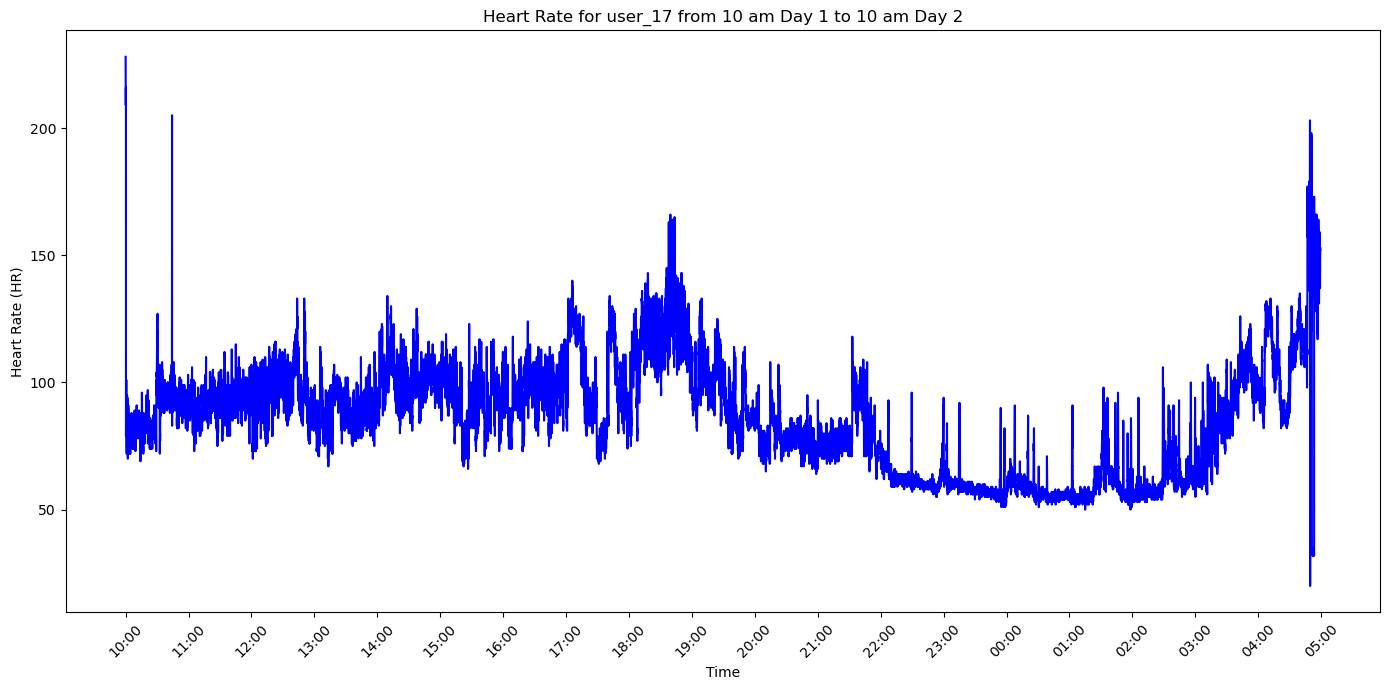

In [21]:
import matplotlib.dates as mdates

user_to_plot = 'user_17'  
df_user = df_expanded[df_expanded['user'] == user_to_plot]

df_user['time'] = pd.to_datetime(df_user['time'], format='%H:%M:%S').dt.time

df_user['Day'] = pd.to_datetime(df_user['Day'], format='%d', errors='coerce')

df_user['datetime'] = pd.to_datetime(df_user['Day'].astype(
    str) + ' ' + df_user['time'].astype(str), errors='coerce')

start_time = pd.Timestamp('2024-01-01 10:00:00')
df_user['datetime'] = start_time + pd.to_timedelta(df_user.index, unit='s')

# Initialize the plot
plt.figure(figsize=(14, 7))

plt.plot(df_user['datetime'], df_user['HR'], color='blue', label='Heart Rate')

plt.title(f'Heart Rate for {user_to_plot} from 10 am Day 1 to 10 am Day 2')
plt.xlabel('Time')
plt.ylabel('Heart Rate (HR)')

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [22]:
df_expanded[(df_expanded['HR']>155) & (df_expanded['time'] > dt.time(10,00,00)) & (df_expanded['time'] < dt.time(10,30,00)) & (df_expanded['Day'] ==1)]['user'].unique()

array(['user_1', 'user_17', 'user_3'], dtype=object)

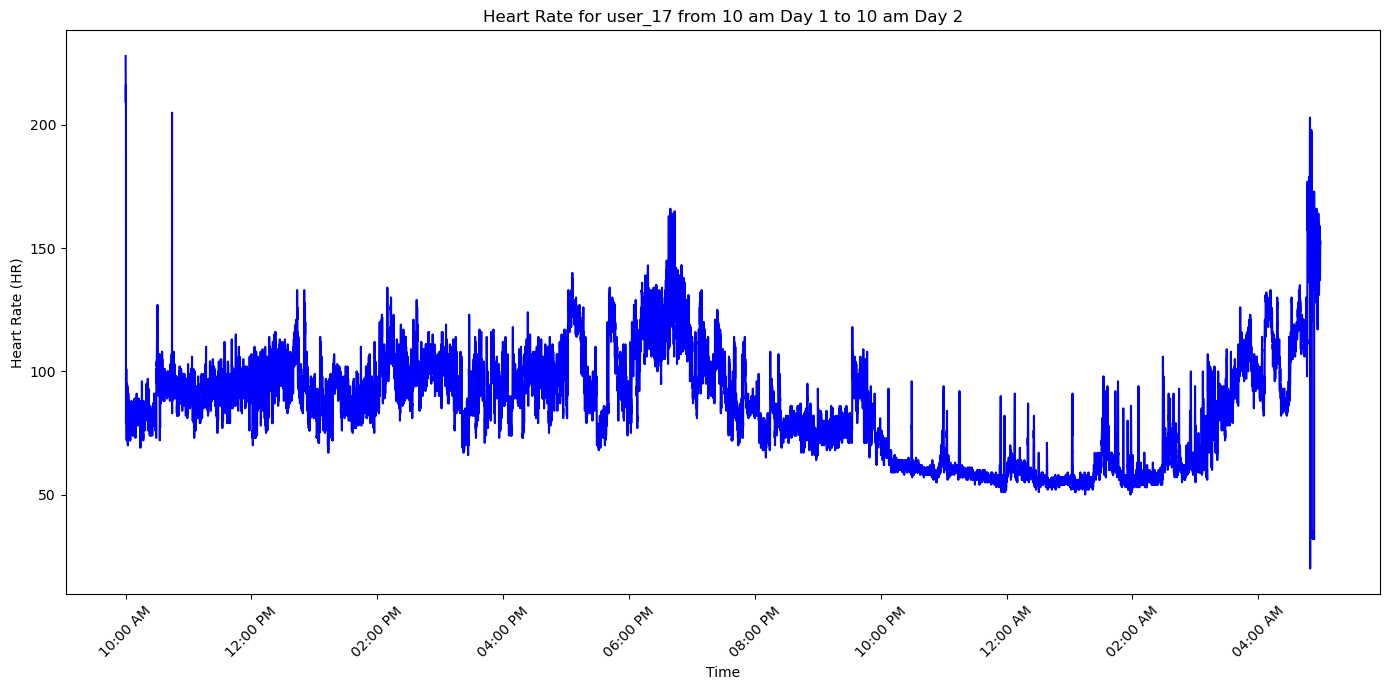

In [36]:
import warnings
warnings.filterwarnings("ignore", category=Warning)
user_to_plot = 'user_17'
df_user = df_expanded[df_expanded['user'] == user_to_plot]

df_user['time'] = pd.to_datetime(df_user['time'], format='%H:%M:%S').dt.time
df_user['Day'] = pd.to_datetime(df_user['Day'], format='%d', errors='coerce')

df_user['datetime'] = pd.to_datetime(df_user['Day'].astype(
    str) + ' ' + df_user['time'].astype(str), errors='coerce')

start_time = pd.Timestamp('2024-01-01 10:00:00')
df_user['datetime'] = start_time + pd.to_timedelta(df_user.index, unit='s')

plt.figure(figsize=(14, 7))

plt.plot(df_user['datetime'], df_user['HR'], color='blue', label='Heart Rate')

plt.title(f'Heart Rate for {user_to_plot} from 10 am Day 1 to 10 am Day 2')
plt.xlabel('Time')
plt.ylabel('Heart Rate (HR)')

plt.gca().xaxis.set_major_locator(
    mdates.HourLocator(interval=2))  
plt.gca().xaxis.set_major_formatter(
    mdates.DateFormatter('%I:%M %p'))  

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [37]:
df_user = df_expanded[df_expanded['user'] == user_to_plot]

(32400.0, 84600.0)

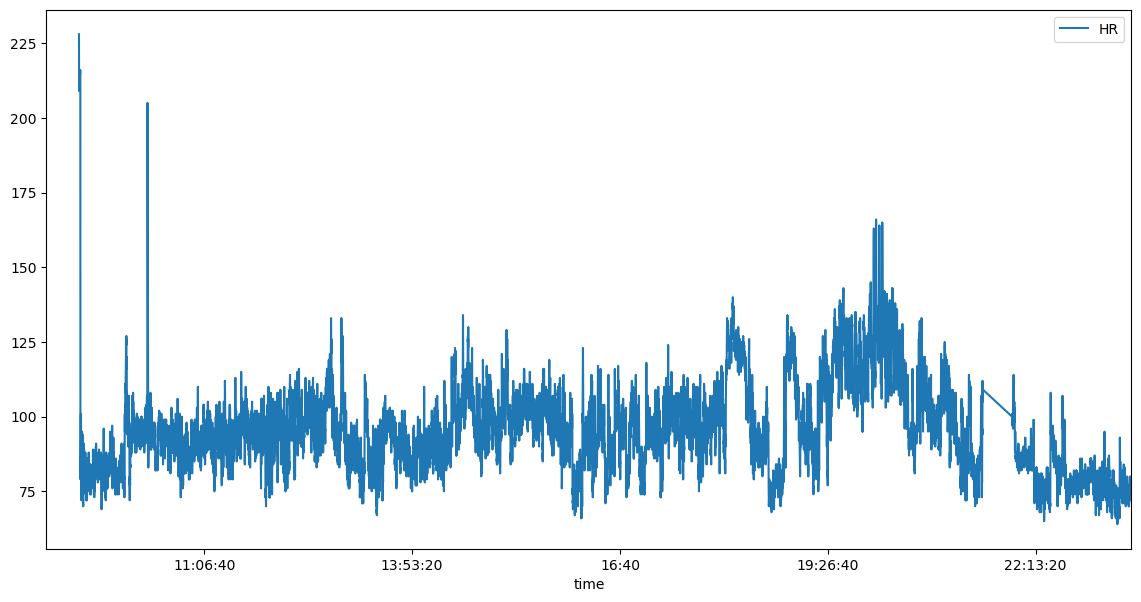

In [ ]:
df_user[df_user['Day'] ==1].plot(x='time',y='HR',kind='line',figsize=(14,7))

plt.xlim([dt.time(9,00,00),dt.time(23,30,00)])
